# Data Explanation

This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

- **Objectve** : Create predictive ML models that are able to predict prices and find out what features (columns) have the most influence on house price determination
- **Business Impact** : Recommendations or business solutions: Pay attention to the characteristics that affect the price

# Data Working

In [1]:
!pip install lazypredict
!pip install shap
!pip install scikit-optimize

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/kevinnkevinn/portfoliodatascience/main/Data%20Source/housing.csv", sep=',')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

# Exploratory Data Analysis (EDA)

In [5]:
print("Numbers of rows:", data.shape[0])
print("Numbers of columns:", data.shape[1])

Numbers of rows: 20640
Numbers of columns: 10


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [8]:
data['ocean_proximity'].describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

In [9]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There is a missing value in the 'total bedrooms' column

**Handling Missing Values**

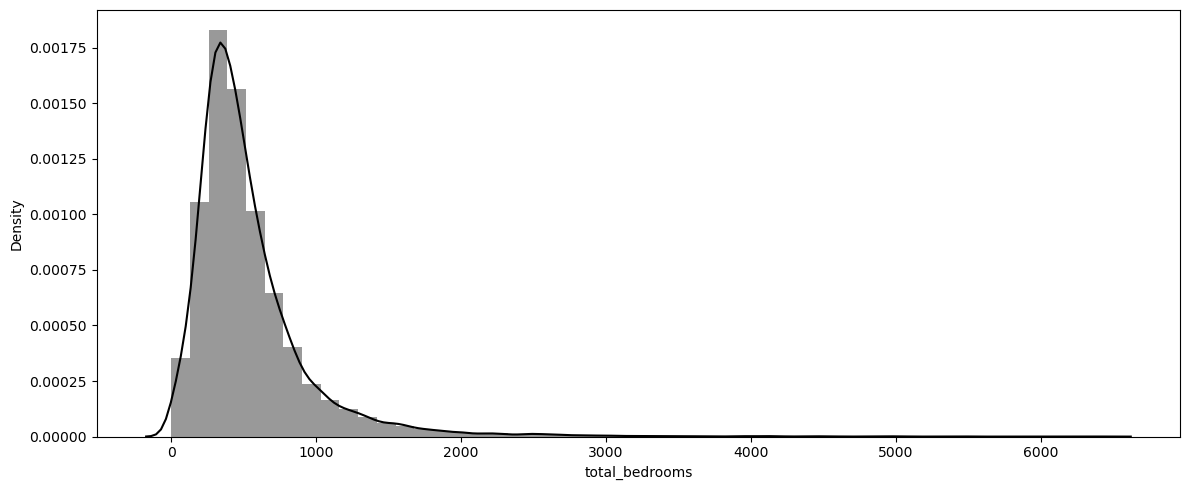

In [10]:
plt.figure(figsize=(12, 5))
sns.distplot(data["total_bedrooms"], color='black')
plt.tight_layout()

Since the column is strongly **right-skewed**, it is preferable to imput the values using the **median**.

In [11]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

In [12]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Data Visualization

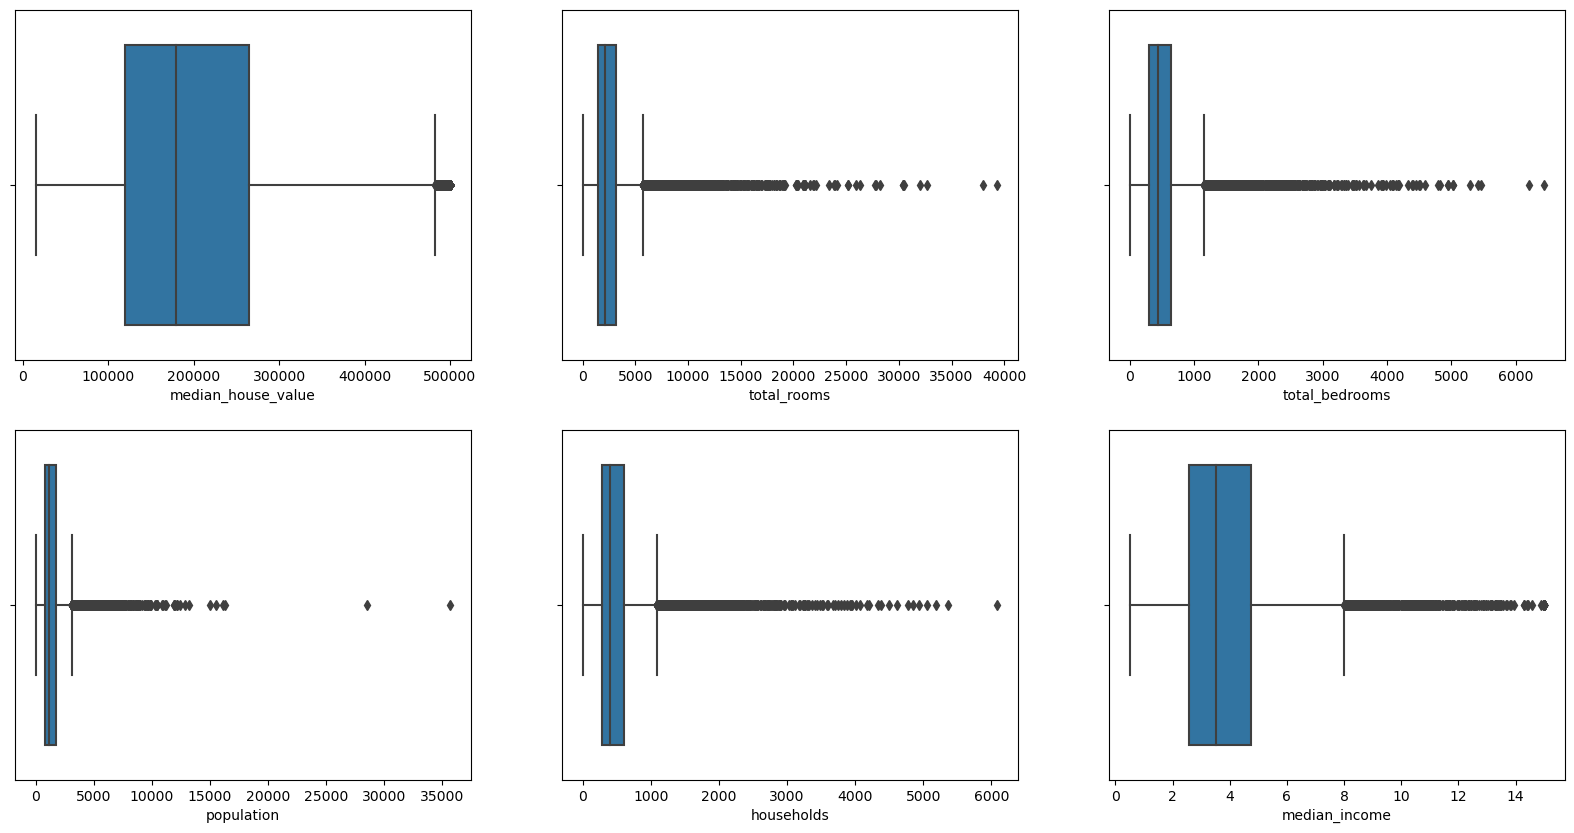

In [13]:
figure, ((ax1, ax2, ax3), ( ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(20, 10)

sns.boxplot(data = data, x = 'median_house_value', ax = ax1)
sns.boxplot(data = data, x = 'total_rooms',  ax = ax2)
sns.boxplot(data = data, x = 'total_bedrooms',  ax = ax3)
sns.boxplot(data = data, x = 'population',  ax = ax4)
sns.boxplot(data = data, x = 'households',  ax = ax5)
sns.boxplot(data = data, x = 'median_income',  ax = ax6)


plt.show()

**Handling Outliers**

In [14]:
from scipy import stats


print(f'Number of rows before filtering outliers: {len(data)}')

filtered_entries = np.array([True] * len(data))
num_var = data.select_dtypes(exclude=['object']).columns.tolist()
for col in num_var:
    zscore = abs(stats.zscore(data[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
data = data[filtered_entries]

print(f'Number of rows after filtering outliers: {len(data)}')

Number of rows before filtering outliers: 20640
Number of rows after filtering outliers: 19746


**Correlation**

<AxesSubplot:>

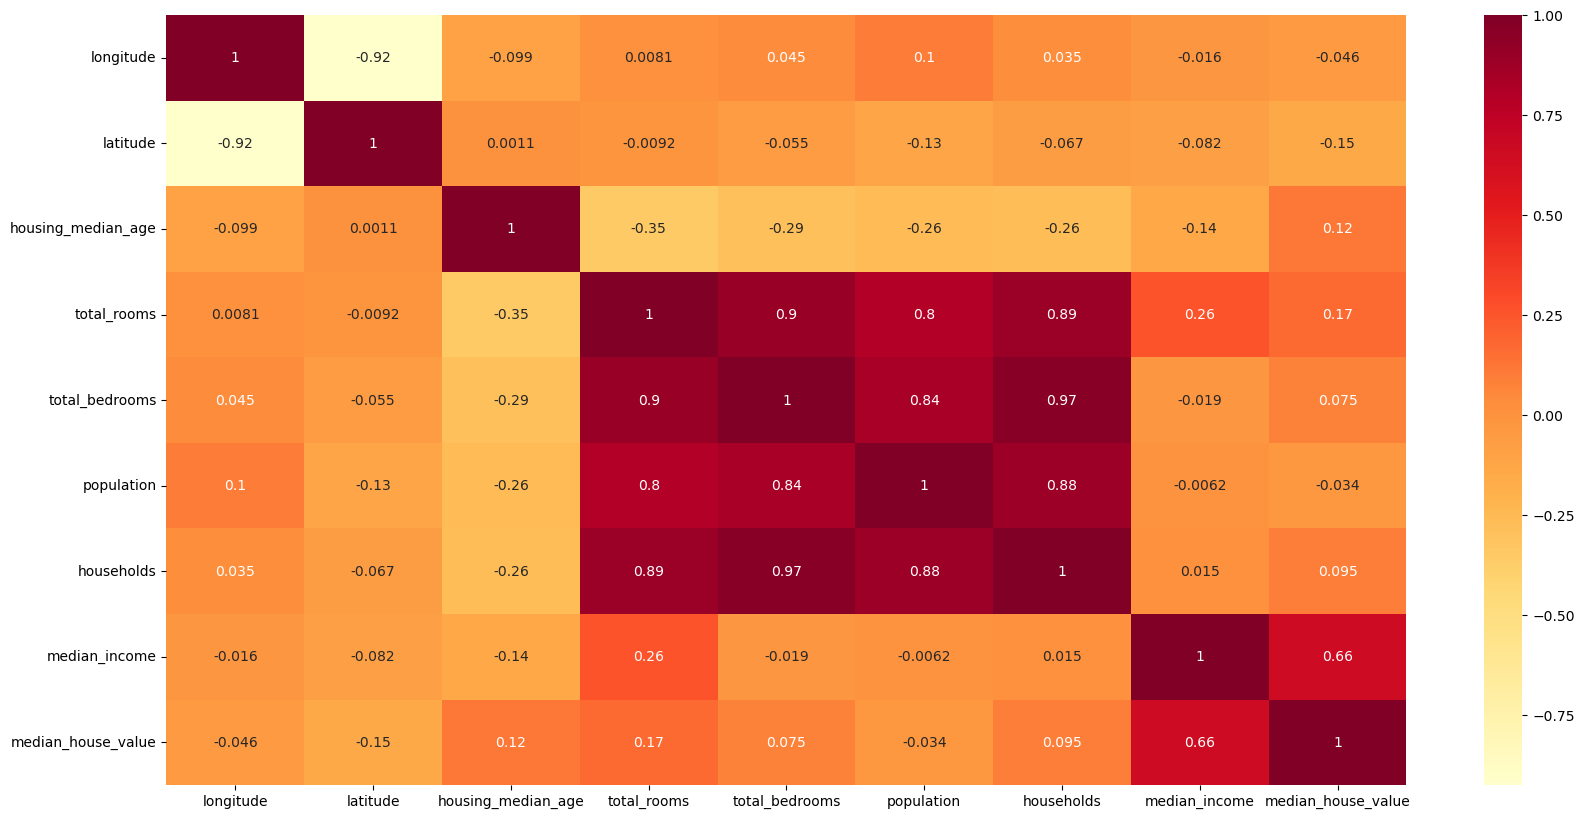

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), cmap="YlOrRd", annot = True)

**Create New feature/column**

In [16]:
data['ratio_house_income'] = data['median_income'] / data['median_house_value']
data['ratio_population_rooms'] = data['total_rooms'] / data['population']
data['ratio_households_bedrooms'] = data['total_bedrooms'] / data['households']
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ratio_house_income,ratio_population_rooms,ratio_households_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.000018,2.732919,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.000023,2.956685,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.000021,2.957661,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.000017,2.283154,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.000011,2.879646,1.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.000020,1.970414,1.133333
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.000033,1.957865,1.315789
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.000018,2.238332,1.120092
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.000022,2.510121,1.171920


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19746 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  19746 non-null  float64
 1   latitude                   19746 non-null  float64
 2   housing_median_age         19746 non-null  float64
 3   total_rooms                19746 non-null  float64
 4   total_bedrooms             19746 non-null  float64
 5   population                 19746 non-null  float64
 6   households                 19746 non-null  float64
 7   median_income              19746 non-null  float64
 8   median_house_value         19746 non-null  float64
 9   ocean_proximity            19746 non-null  object 
 10  ratio_house_income         19746 non-null  float64
 11  ratio_population_rooms     19746 non-null  float64
 12  ratio_households_bedrooms  19746 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.1+ M

In [18]:
data_encoded = pd.get_dummies(data, prefix='ocean_proximity')
data_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ratio_house_income,ratio_population_rooms,ratio_households_bedrooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.000018,2.732919,1.023810,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.000023,2.956685,0.971880,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.000021,2.957661,1.073446,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.000017,2.283154,1.073059,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.000011,2.879646,1.081081,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.000020,1.970414,1.133333,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.000033,1.957865,1.315789,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.000018,2.238332,1.120092,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.000022,2.510121,1.171920,0,1,0,0,0


In [19]:
from  sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from  sklearn.metrics import roc_curve, auc
import shap

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.4f" % auc(fpr, tpr))

def built_in_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def shap_feature_importance(model_input,X):
    explainer = shap.TreeExplainer(model_input)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X, plot_type="bar")
    print("="*30)
    shap.summary_plot(shap_values, X)
  

In [20]:
data = data_encoded.copy()

In [21]:
data = data.drop(['total_bedrooms', 'total_rooms','population','households'], axis = 1)
data

,longitude,latitude,housing_median_age,median_income,median_house_value,ratio_house_income,ratio_population_rooms,ratio_households_bedrooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,8.3252,452600.0,0.000018,2.732919,1.023810,0,0,0,1,0
1,-122.22,37.86,21.0,8.3014,358500.0,0.000023,2.956685,0.971880,0,0,0,1,0
2,-122.24,37.85,52.0,7.2574,352100.0,0.000021,2.957661,1.073446,0,0,0,1,0
3,-122.25,37.85,52.0,5.6431,341300.0,0.000017,2.283154,1.073059,0,0,0,1,0
4,-122.25,37.85,52.0,3.8462,342200.0,0.000011,2.879646,1.081081,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1.5603,78100.0,0.000020,1.970414,1.133333,0,1,0,0,0
20636,-121.21,39.49,18.0,2.5568,77100.0,0.000033,1.957865,1.315789,0,1,0,0,0
20637,-121.22,39.43,17.0,1.7000,92300.0,0.000018,2.238332,1.120092,0,1,0,0,0
20638,-121.32,39.43,18.0,1.8672,84700.0,0.000022,2.510121,1.171920,0,1,0,0,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19746 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   19746 non-null  float64
 1   latitude                    19746 non-null  float64
 2   housing_median_age          19746 non-null  float64
 3   median_income               19746 non-null  float64
 4   median_house_value          19746 non-null  float64
 5   ratio_house_income          19746 non-null  float64
 6   ratio_population_rooms      19746 non-null  float64
 7   ratio_households_bedrooms   19746 non-null  float64
 8   ocean_proximity_<1H OCEAN   19746 non-null  uint8  
 9   ocean_proximity_INLAND      19746 non-null  uint8  
 10  ocean_proximity_ISLAND      19746 non-null  uint8  
 11  ocean_proximity_NEAR BAY    19746 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  19746 non-null  uint8  
dtypes: float64(8), uint8(5)
memory 

## Split dataset

In [23]:
from sklearn.model_selection import train_test_split 

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
y.value_counts()

500001.0    663
137500.0    120
162500.0    117
112500.0     99
187500.0     91
           ... 
384800.0      1
432700.0      1
420200.0      1
427200.0      1
47000.0       1
Name: median_house_value, Length: 3797, dtype: int64

In [25]:
print("Numbers of training dataset:", len(X_train))
print("Numbers of testing dataset:", len(X_test))

Numbers of training dataset: 14809
Numbers of testing dataset: 4937


## Modeling

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

**Linear Regression**

In [27]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

In [28]:
#koefisien
print('Coefficient: \n', linreg.coef_)

#intercept
print('Intercept: \n', linreg.intercept_)

#MSE, MAE, dan RMSE
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("RMSE: %.2f" % mean_squared_error(y_test, y_pred, squared=False))

#R-squared
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Coefficient: 
 [-5.78953076e+03 -5.69332271e+03  6.40015941e+02  4.60587660e+04
 -7.35626788e+09  1.34944355e+04 -2.08821836e+04 -2.81733283e+04
 -1.76008252e+04  8.85026090e+04 -2.37510005e+04 -1.89773938e+04]
Intercept: 
 -301267.66951925127
MSE: 2641479808.95
MAE: 31285.57
RMSE: 51395.33
R2 score: 0.78


**Ridge Regression**

In [29]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 1)
ridge_model.fit(X_train, y_train)

y_pred2 = ridge_model.predict(X_test)

In [30]:
#koefisien
print('Coefficient: \n', ridge_model.coef_)

#intercept
print('Intercept: \n', ridge_model.intercept_)

#MSE, MAE, dan RMSE
print("MSE: %.2f" % mean_squared_error(y_test, y_pred2))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred2))
print("RMSE: %.2f" % mean_squared_error(y_test, y_pred2, squared=False))

#R-squared
print('R2 score: %.2f' % r2_score(y_test, y_pred2))

Coefficient: 
 [-31121.71409289 -30633.50398811    985.34335702  32849.36871328
  -5579.64378763  33365.51041042 -49608.33908958 -18190.36716374
 -60927.92538865 117001.34507922 -21658.13082278 -16224.92170442]
Intercept: 
 -2557406.5527807716
MSE: 4780826451.43
MAE: 50285.59
RMSE: 69143.52
R2 score: 0.61


**Lasso Regression**

In [31]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

y_pred3 = lasso_model.predict(X_test)

In [32]:
#koefisien
print('Coefficient: \n', lasso_model.coef_)

#intercept
print('Intercept: \n', lasso_model.intercept_)

#MSE, MAE, dan RMSE
print("MSE: %.2f" % mean_squared_error(y_test, y_pred3))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred3))
print("RMSE: %.2f" % mean_squared_error(y_test, y_pred3, squared=False))

#R-squared
print('R2 score: %.2f' % r2_score(y_test, y_pred3))

Coefficient: 
 [-31103.87358594 -30610.58465558    984.85836886  32847.45073465
     -0.          33386.00657645 -49669.25609996   9038.66991099
 -33743.51967418 164710.21046687   5535.53975459  10989.41327186]
Intercept: 
 -2583258.2085834546
MSE: 4781087278.71
MAE: 50283.90
RMSE: 69145.41
R2 score: 0.61


**Elastic Net Regression**

In [33]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet(alpha = 1)
elastic_model.fit(X_train, y_train)

y_pred4 = elastic_model.predict(X_test)

In [34]:
#koefisien
print('Coefficient: \n', elastic_model.coef_)

#intercept
print('Intercept: \n', elastic_model.intercept_)

#MSE, MAE, dan RMSE
print("MSE: %.2f" % mean_squared_error(y_test, y_pred4))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred4))
print("RMSE: %.2f" % mean_squared_error(y_test, y_pred4, squared=False))

#R-squared
print('R2 score: %.2f' % r2_score(y_test, y_pred4))

Coefficient: 
 [-14418.80465341 -15048.23539378   1346.23336617  34640.67755603
     -0.           9881.64565753  -4248.00346458   6920.20334052
 -16090.77121851    116.48571988   3720.90397642   5330.17811869]
Intercept: 
 -1167436.933780854
MSE: 5235260514.06
MAE: 53887.19
RMSE: 72355.10
R2 score: 0.57
